In [1]:
# Bibliotheken laden
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Daten laden
dateipfad = '../data/v3/230920_16042025.csv'
df_original = pd.read_csv(dateipfad)
df_original

,T (s),T1,T2,T3,CL1cBAK2,CL2polyAC,CL3cBAK2,CL4polyAC,CL5cBAK2,CL6polyAC,...,Tim.,Setpoint,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8
0,8.437000,26.993080,22.811928,27.111687,475.553680,146.561111,-59.988747,191.237793,316.490753,1645.053101,...,600.0,27.0,-0.179943,-0.055457,0.022699,-0.072362,-0.119756,-0.622466,-0.598619,-0.726564
1,11.872000,26.976704,22.835903,27.112249,474.678497,146.308914,-60.041126,190.891220,316.166992,1643.306519,...,600.0,27.0,-0.179612,-0.055361,0.022719,-0.072231,-0.119633,-0.621805,-0.598552,-0.726750
2,15.315001,26.970303,22.837029,27.114250,474.501099,145.889969,-61.196022,190.221893,315.492401,1642.932007,...,600.0,27.0,-0.179545,-0.055203,0.023156,-0.071977,-0.119378,-0.621663,-0.598510,-0.726521
3,18.723999,26.969501,22.830347,27.112562,474.658752,145.847504,-61.059010,190.357803,315.711182,1642.330933,...,600.0,27.0,-0.179605,-0.055187,0.023104,-0.072029,-0.119461,-0.621436,-0.598378,-0.726217
4,22.473999,26.984280,22.820419,27.112749,474.220947,145.286774,-61.449261,190.111740,315.503784,1643.183228,...,600.0,27.0,-0.179439,-0.054975,0.023252,-0.071936,-0.119382,-0.621758,-0.598111,-0.726208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,12388.938477,26.958353,22.740810,27.114687,-3036.363281,-3844.352295,-3859.303467,-3934.369629,-3325.808838,-2372.959717,...,600.0,27.0,1.148919,1.454651,1.460309,1.488713,1.258441,0.897896,0.748425,0.746313
3515,12392.353516,26.955793,22.747616,27.116249,-3146.672119,-3886.449707,-3870.962402,-3935.779297,-3326.944580,-2376.055664,...,600.0,27.0,1.190658,1.470580,1.464720,1.489246,1.258871,0.899068,0.748054,0.741568
3516,12395.801758,26.973289,22.751175,27.115625,-3188.725586,-3884.202881,-3885.998291,-3942.832275,-3367.707764,-2373.500732,...,600.0,27.0,1.206571,1.469730,1.470410,1.491915,1.274295,0.898101,0.746214,0.778338
3517,12399.221680,26.983265,22.756794,27.115376,-3129.875977,-3881.229248,-3895.237061,-3940.491211,-3353.186279,-2373.977051,...,600.0,27.0,1.184303,1.468605,1.473905,1.491029,1.268801,0.898281,0.753981,0.770609


In [3]:
# Kopie des DataFrames erstellen
df = df_original.copy()

# gewünschte Spaltenpositionen
spalten_indices = [0, 4, 5, 6, 7, 8, 9, 10, 11]

# neues DataFrame erstellen
df = df.iloc[:, spalten_indices]
df.head()

,T (s),CL1cBAK2,CL2polyAC,CL3cBAK2,CL4polyAC,CL5cBAK2,CL6polyAC,CL7cBAK2,CL8polyAC
0,8.437000,475.553680,146.561111,-59.988747,191.237793,316.490753,1645.053101,1582.031494,1920.162476
1,11.872000,474.678497,146.308914,-60.041126,190.891220,316.166992,1643.306519,1581.854004,1920.655396
2,15.315001,474.501099,145.889969,-61.196022,190.221893,315.492401,1642.932007,1581.742676,1920.050171
3,18.723999,474.658752,145.847504,-61.059010,190.357803,315.711182,1642.330933,1581.393921,1919.245972
4,22.473999,474.220947,145.286774,-61.449261,190.111740,315.503784,1643.183228,1580.688354,1919.221436


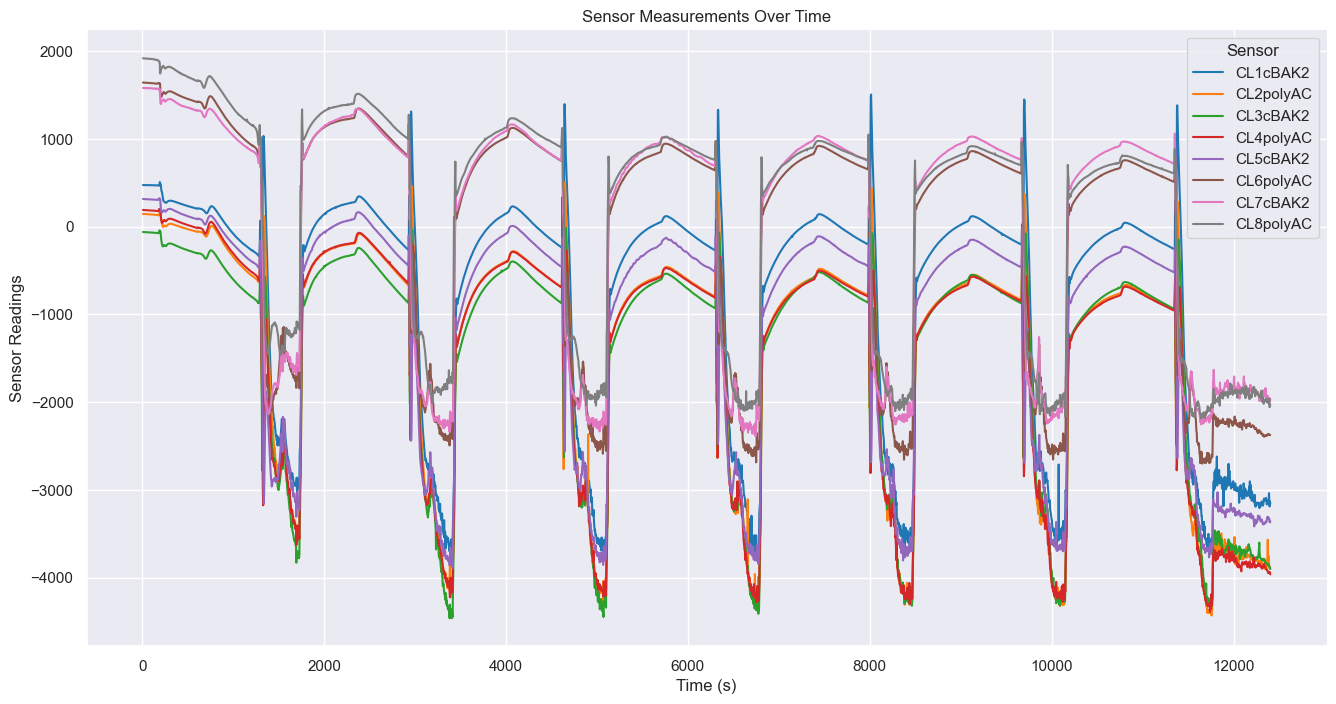

In [ ]:
import seaborn as sns

# Zeitspalte umbenennen
df = df.rename(columns={"T  (s)": "Time"})

# Daten ins „lange“ Format bringen
df_long = df.melt(id_vars='Time', var_name='Sensor', value_name='Value')

# Seaborn-Theme setzen und Figur-Grösse anpassen
sns.set_theme(style='darkgrid', rc={'figure.figsize': (16, 8)})

# Lineplot erstellen
ax = sns.lineplot(data=df_long, x='Time', y='Value', hue='Sensor', palette='tab10')

# Achsenbeschriftungen und Titel über das Axes-Objekt setzen
ax.set_xlabel('Time (s)')
ax.set_ylabel('Sensor Readings')
ax.set_title('Sensor Measurements Over Time')

# Obere und rechte Rahmen entfernen
sns.despine()

In [5]:
import plotly.express as px

# Seaborn-Stil setzen
sns.set_theme()

# Sensor-Spalten auswählen
sensor_cols = [col for col in df.columns if col != 'Time']

# Interaktives Liniendiagramm mit Plotly Express
fig = px.line(
    df,
    x='Time',
    y=sensor_cols,
    labels={'value': 'Sensorwert', 'variable': 'Sensor'},
    title='Sensorwerte über die Zeit'
)
fig.update_layout(hovermode='x unified')

# Als interaktive HTML-Datei speichern
fig.write_html('sensor_plot.html')